In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.simplefilter('ignore')

# load data

In [117]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [118]:
df.shape

(316200, 6)

In [119]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [121]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [122]:
#age 123 is a outlier
df.loc[df['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [123]:
df = df.loc[df['age']<90]
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Exploratory data analysis

In [124]:
country_dist = pd.DataFrame(df.loc[:,'country'].value_counts())
country_dist

,country
US,178092
China,76602
UK,48449
Germany,13055


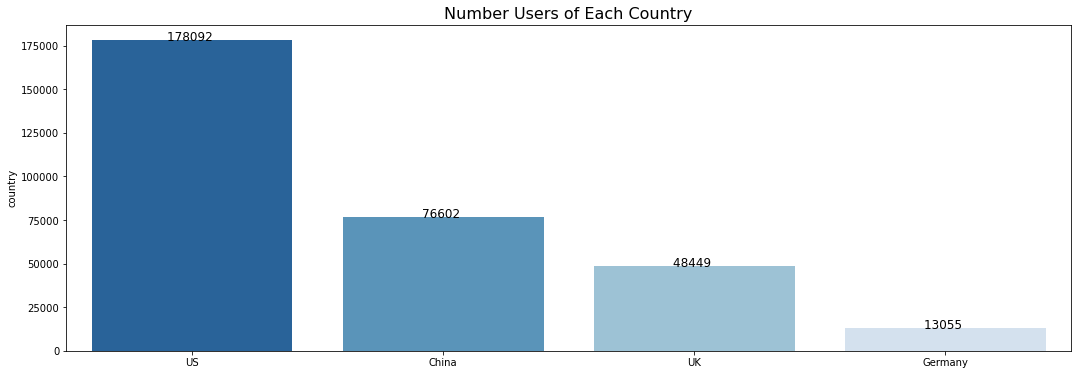

In [125]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=country_dist.index,y='country',data=country_dist, palette='Blues_r')
plt.title('Number Users of Each Country',fontsize=16)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f} '.format(( p.get_height()))
            ax.text(_x, _y, value, ha="center", size = 12)            

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)


plt.show()

   country  converted
0    China   0.001332
1  Germany   0.062428
2       UK   0.052612
3       US   0.037801


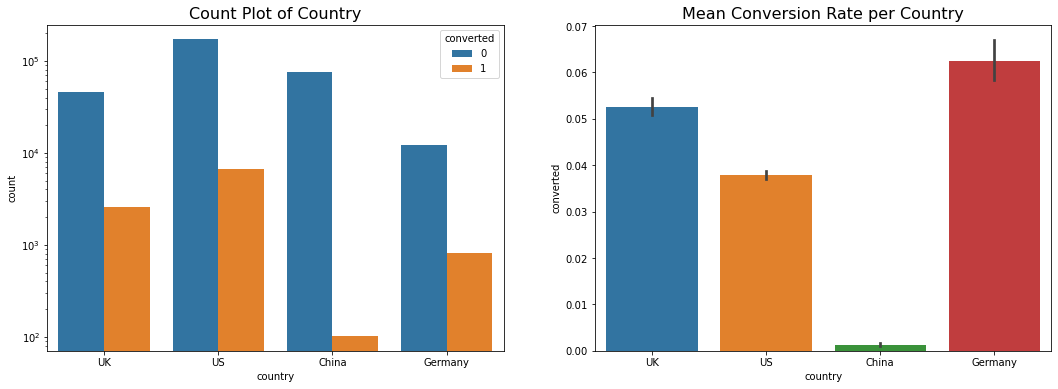

In [126]:
## visualization of different countries

group_df = df.loc[:,['country','converted']].groupby('country').mean().reset_index()
print(group_df)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

sns.countplot(x='country', hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of Country',fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='country',y='converted',data=df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)

plt.show()

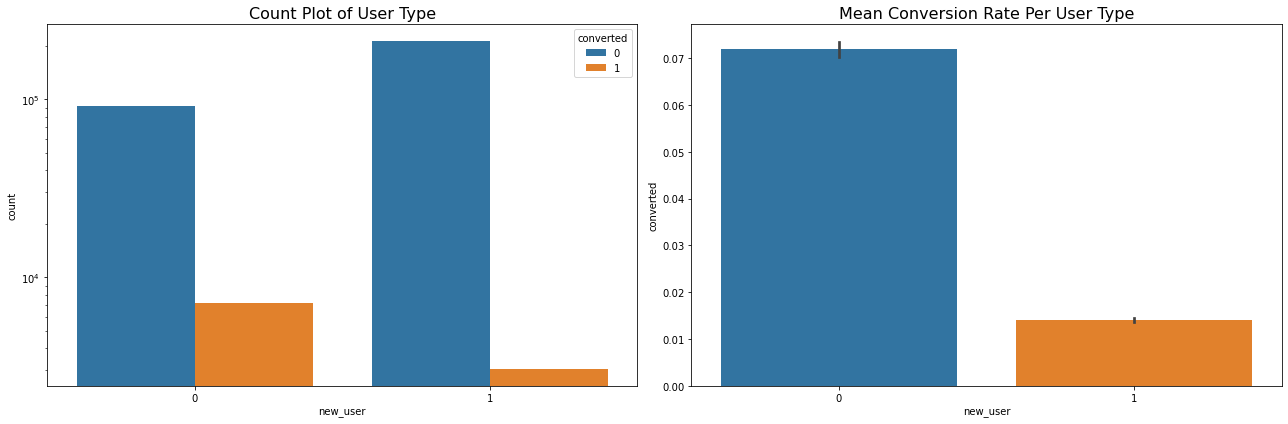

In [127]:
## visualization of different user types

group_user = df.loc[:,['new_user','converted']].groupby('new_user').mean().reset_index()
group_user

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))

sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of User Type', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate Per User Type', fontsize=16)

plt.tight_layout()
plt.show()

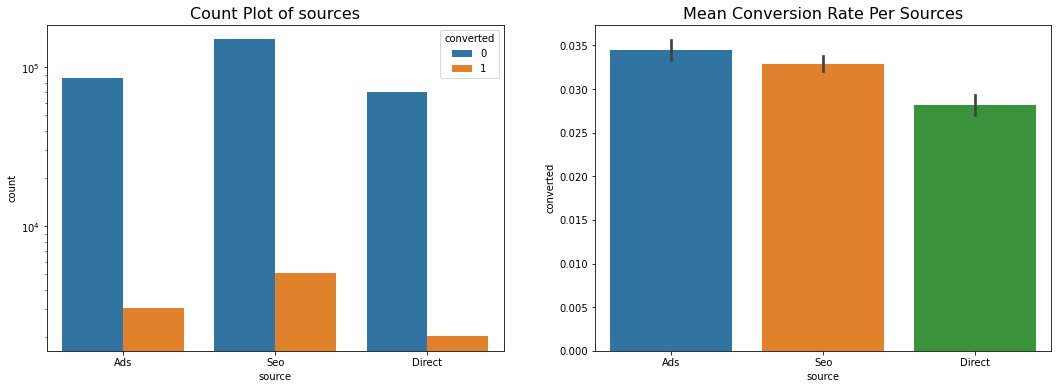

In [128]:
## visualization of different sources

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of sources', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='source', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate Per Sources', fontsize=16)

plt.show()

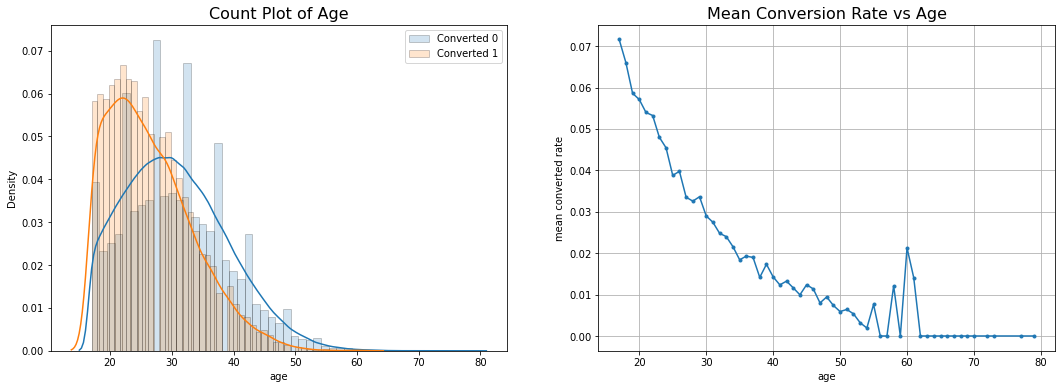

In [129]:
# Visualization of age

group_line = df.loc[:,['age','converted']].groupby('age').mean().reset_index()
hist_kws = {'histtype': 'bar','edgecolor':'black', 'alpha':0.2}

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.distplot(df[df['converted']==0]['age'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted']==1]['age'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()

ax[1].plot(group_line['age'],group_line['converted'],'.-')
ax[1].set_title('Mean Conversion Rate vs Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('mean converted rate')
ax[1].grid(True)

plt.show()

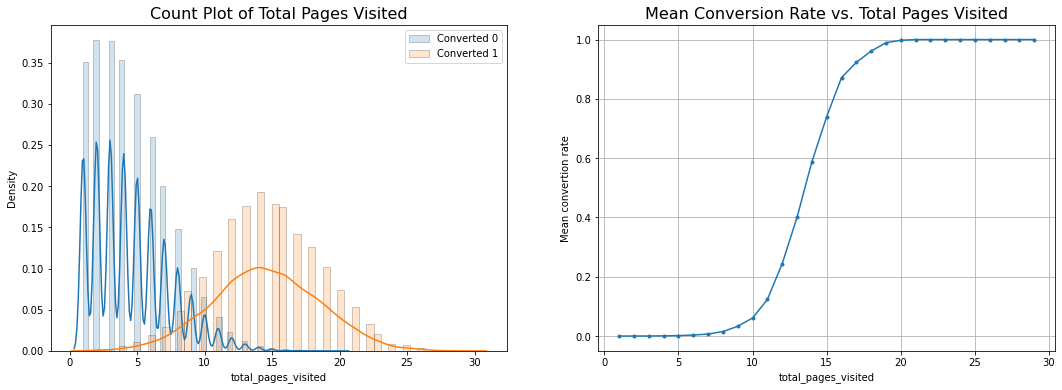

In [130]:
# Visualization of total pages visited

grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total Pages Visited', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total Pages Visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

## Data Preprocessing

In [131]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [132]:
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
y = df.loc[:,'converted']

In [133]:
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)

In [134]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [135]:
y.value_counts()

0    306000
1     10198
Name: converted, dtype: int64

In [136]:
x_train,x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=22)

### Grid Search for Logistic Regression model

In [137]:
logist = LogisticRegression()
logist.fit(x_train, y_train)
pred_y = logist.predict(x_test)
score= round(accuracy_score(y_test,pred_y)* 100, 4)
score

98.5689

In [138]:
logist_cm = confusion_matrix(y_test, pred_y)
print(logist_cm)

[[60943   232]
 [  673  1392]]


Text(0.5, 1.0, 'Logistic regression accuracy Score:98.5689')

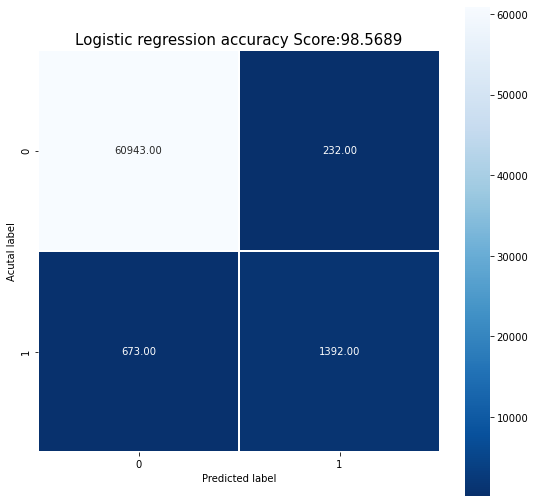

In [139]:
plt.figure(figsize=(9,9))
sns.heatmap(logist_cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Acutal label')
plt.xlabel('Predicted label')
all_sample_title = f'Logistic regression accuracy Score:{score}'
plt.title(all_sample_title, size=15)

In [140]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61175
           1       0.86      0.67      0.75      2065

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.87     63240
weighted avg       0.98      0.99      0.98     63240



 As we see here, when talking about converted user which is label 1, our precision is 0.86 which is not bad, but our recall is not very good, we only have 0.67, which means we incorrectly predicted that 32% of converted users were non-converted users.


In [141]:
feat_importances = pd.DataFrame({"name":x_train.columns,"coef":best_logist.coef_[0]})
feat_importances = feat_importances[['name','coef']]
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-6.693347,6.693347
6,country_US,-3.487038,3.487038
5,country_UK,-3.130770,3.130770
4,country_Germany,-2.966734,2.966734
8,source_Direct,-2.431365,2.431365
9,source_Seo,-2.246079,2.246079
7,source_Ads,-2.218094,2.218094
1,new_user,-1.698369,1.698369
2,total_pages_visited,0.759277,0.759277
0,age,-0.074143,0.074143


Conclusion:

1. We can see that the conversion rate from China was very poor. We know that there were a lot of users coming from China, but their conversion rate was very low. So, the main task is to improve the conversion rate. I think we should consider if the design style of the websites had matched Chinese users' preferences and if the ads had met the primary needs of Chinese users.

2. We can see that the conversion rate from Germany was good since there are not many German users, it's a huge opportunity for us to improve this market. I think the main task is to increase the number of users from Germany, so, we should increase the number of advertisements to increase brand awareness, let more German users know the company.

3. We can see that the conversion rate from old users was good, I think we should keep in touch with them, try to send some coupons or discount codes to them to increase the brand loyalty.

4. We can see that the older the user, the lower the conversion rate. I think we should find ways to increase the number of young users, for example, referral friends to get discounts. On the other hand, we should also try to figure out why older users are reluctant to convert.

5. We can see that total_pages_visited was positively correlated with the conversion rate. The longer users spent on our pages, the more likely they were going to convert and buy something. I think we should send an email to remind users that there are still some products in their shopping cart or there are discounts on products they've looked at before.

## Deal with imbalanced dataset by SMOTE

In [142]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    306000
0    306000
Name: converted, dtype: int64

In [143]:
x_train,x_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=22)

In [144]:
logist = LogisticRegression()
logist.fit(x_train, y_train)
pred_y = logist.predict(x_test)
score_sm= round(accuracy_score(y_test,pred_y)* 100, 4)
score_sm

95.1626

In [145]:
logist_cm = confusion_matrix(y_test, pred_y)
print(logist_cm)

[[58117  2968]
 [ 2953 58362]]


Text(0.5, 1.0, 'Logistic regression accuracy Score:98.5689')

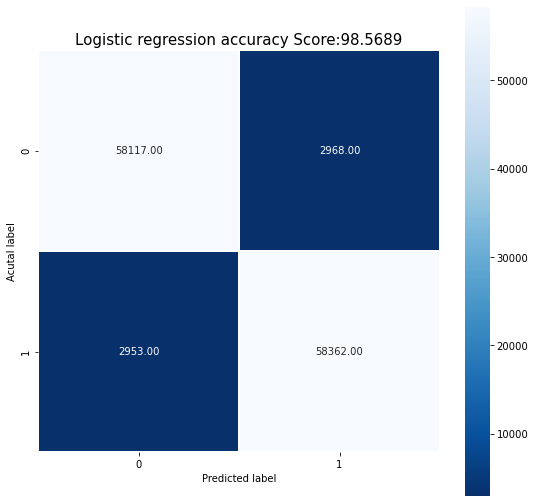

In [146]:
plt.figure(figsize=(9,9))
sns.heatmap(logist_cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Acutal label')
plt.xlabel('Predicted label')
all_sample_title = f'Logistic regression accuracy Score:{score}'
plt.title(all_sample_title, size=15)

In [147]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     61085
           1       0.95      0.95      0.95     61315

    accuracy                           0.95    122400
   macro avg       0.95      0.95      0.95    122400
weighted avg       0.95      0.95      0.95    122400



In [148]:
feat_importances = pd.DataFrame({"name":x_train.columns,"coef":best_logist.coef_[0]})
feat_importances = feat_importances[['name','coef']]
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-6.693347,6.693347
6,country_US,-3.487038,3.487038
5,country_UK,-3.130770,3.130770
4,country_Germany,-2.966734,2.966734
8,source_Direct,-2.431365,2.431365
9,source_Seo,-2.246079,2.246079
7,source_Ads,-2.218094,2.218094
1,new_user,-1.698369,1.698369
2,total_pages_visited,0.759277,0.759277
0,age,-0.074143,0.074143
